<a href="https://colab.research.google.com/github/EricUfomadu/EricUfomadu/blob/main/Employee_Salary_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EmployeeID             0
Age                    0
Salary                 0
Years of Experience    0
Department             0
Performance Rating     0
Gender                 0
dtype: int64
       EmployeeID         Age         Salary  Years of Experience  \
count  100.000000  100.000000     100.000000           100.000000   
mean    50.500000   40.060000   77618.640000            22.100000   
std     29.011492   10.688255   25454.250799            11.437578   
min      1.000000   22.000000   30206.000000             0.000000   
25%     25.750000   30.000000   55302.500000            15.000000   
50%     50.500000   41.500000   80747.500000            24.000000   
75%     75.250000   48.000000   97182.500000            32.000000   
max    100.000000   59.000000  119474.000000            39.000000   

       Performance Rating  
count          100.000000  
mean             3.080000  
std              1.440258  
min              1.000000  
25%              2.000000  
50%              3.000

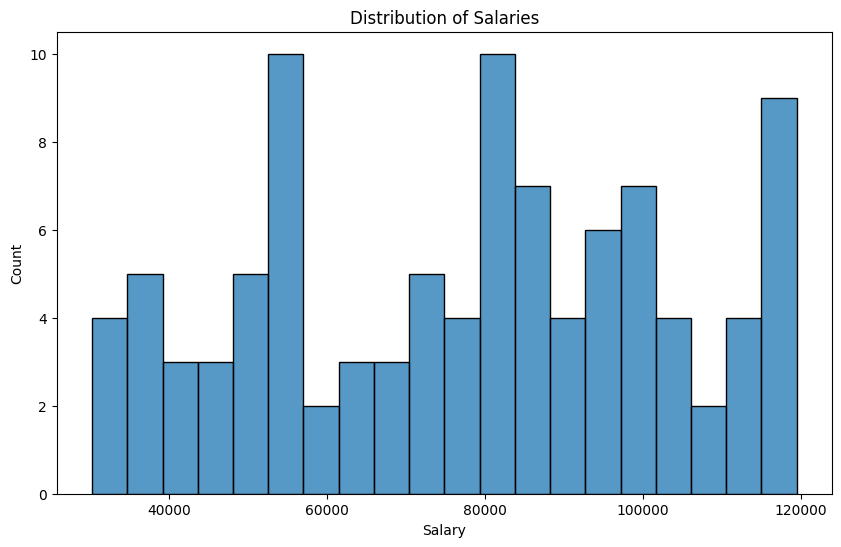

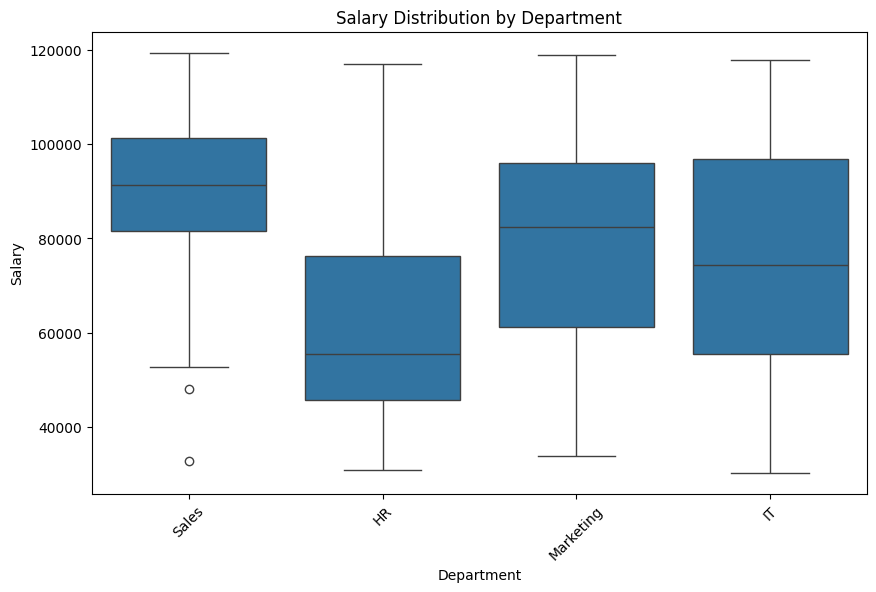

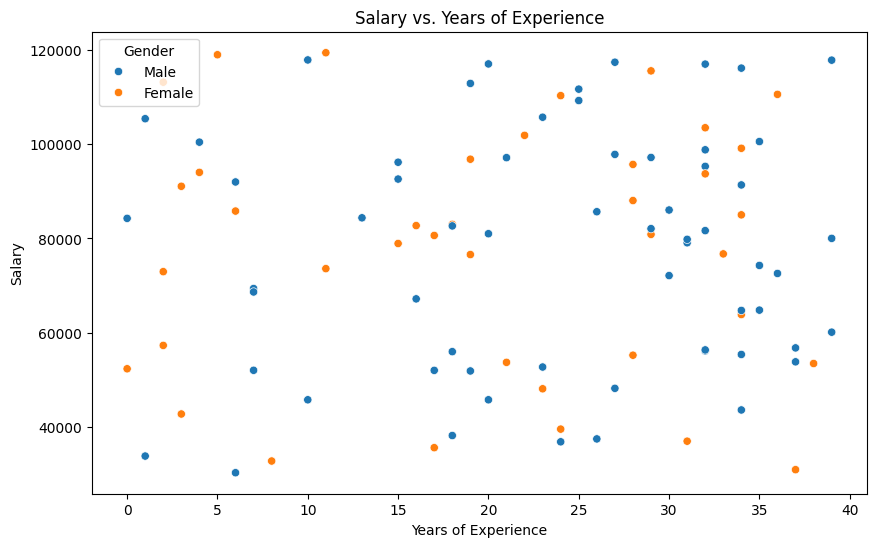


Linear Regression Results:
Mean Squared Error: 731397972.32
R-squared Score: -0.19

Polynomial Regression Results:
Mean Squared Error: 775392786.35
R-squared Score: -0.27

Gradient Boosting Regression Results:
Mean Squared Error: 1060514768.94
R-squared Score: -0.73


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load and clean the dataset
df = pd.read_csv('employee_data.csv')

# Check for missing values and remove any rows with missing values
print(df.isnull().sum())
df = df.dropna()

# 2. Perform exploratory data analysis
print(df.describe())
print(df.info())

# 3. Calculate various statistics
avg_salary = df['Salary'].mean()
median_age = df['Age'].median()
dept_counts = df['Department'].value_counts()

print(f"Average Salary: ${avg_salary:.2f}")
print(f"Median Age: {median_age}")
print("\nDepartment Distribution:")
print(dept_counts)

# 4. Visualize the data
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=20)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Gender', data=df)
plt.title('Salary vs. Years of Experience')
plt.show()

# 5. Regression Analysis

# Prepare the data for regression
X = df[['Years of Experience', 'Performance Rating', 'Age']]
y = df['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R-squared Score: {r2_lr:.2f}")

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Results:")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared Score: {r2_poly:.2f}")

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regression Results:")
print(f"Mean Squared Error: {mse_gb:.2f}")
print(f"R-squared Score: {r2_gb:.2f}")
